In [5]:
import pandas as pd
dataset = pd.read_csv('lap.csv', encoding = "ISO-8859-1")

In [6]:
dataset.shape

(1303, 13)

In [7]:
data = dataset.sample(frac=0.88, random_state=786)
data_unseen = dataset.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (1147, 13)
Unseen Data For Predictions: (156, 13)


In [13]:
from pycaret.regression import *
exp_reg101 = setup(data = data, target = 'Price_euros', session_id=123, silent = True, ignore_features = ['laptop_ID']) 

,Description,Value
0,session_id,123
1,Target,Price_euros
2,Original Data,"(1147, 13)"
3,Missing Values,False
4,Numeric Features,1
5,Categorical Features,10
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(802, 796)"


In [14]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
ridge,Ridge Regression,198.0238,90283.6621,296.7643,0.8315,0.2568,0.2013,0.0300
br,Bayesian Ridge,197.4400,93038.2144,301.1293,0.8269,0.2646,0.2005,1.2230
huber,Huber Regressor,199.6007,96185.5839,305.6369,0.8240,0.2652,0.1944,0.4820
catboost,CatBoost Regressor,208.4172,100192.2684,310.5985,0.8139,0.2493,0.2045,2.3780
lasso,Lasso Regression,216.8753,100719.9148,313.5594,0.8104,0.2888,0.2237,0.0370
gbr,Gradient Boosting Regressor,227.8443,107431.4613,321.3581,0.7985,0.2711,0.2330,0.3440
knn,K Neighbors Regressor,213.9873,118058.4969,338.8470,0.7846,0.2442,0.1988,0.0520
rf,Random Forest Regressor,211.1090,118343.8191,333.9975,0.7814,0.2421,0.1897,0.5610
llar,Lasso Least Angle Regression,247.9203,124980.5374,347.4378,0.7653,0.3104,0.2712,0.9580
par,Passive Aggressive Regressor,241.3694,133206.6276,356.8748,0.7586,0.3769,0.2428,0.0910


In [15]:
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


In [16]:
ridge = create_model('ridge')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,207.2144,123957.0859,352.0754,0.8486,0.2375,0.1843
1,194.5926,65550.8359,256.0290,0.8400,0.2910,0.2164
2,186.3341,54938.3438,234.3893,0.8755,0.2435,0.2123
3,188.1840,74077.9609,272.1727,0.8815,0.2847,0.2327
4,210.9646,107615.3125,328.0477,0.7958,0.2672,0.2230
5,170.9415,51964.4258,227.9571,0.8790,0.2131,0.1837
6,214.7526,109533.5625,330.9586,0.8035,0.2816,0.2085
7,215.4256,88221.2656,297.0207,0.8048,0.2976,0.2124
8,191.5809,86720.8594,294.4841,0.8421,0.2220,0.1687
9,200.2479,140256.9688,374.5090,0.7442,0.2300,0.1707


In [17]:
print(ridge)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=123, solver='auto', tol=0.001)


In [18]:
tuned_rg = tune_model(ridge)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,223.9584,122122.6328,349.4605,0.8508,0.2471,0.2021
1,197.9597,64905.9492,254.7665,0.8416,0.3021,0.2235
2,190.8164,53735.6992,231.8096,0.8782,0.2569,0.2290
3,208.0199,86971.2031,294.9088,0.8609,0.2805,0.2444
4,225.0880,110522.0469,332.4486,0.7903,0.2840,0.2459
5,189.3858,60874.2617,246.7271,0.8583,0.2363,0.2069
6,236.5629,132207.1562,363.6030,0.7629,0.3004,0.2330
7,219.6380,90368.1328,300.6129,0.8001,0.2807,0.2137
8,194.8377,85757.1328,292.8432,0.8439,0.2297,0.1815
9,209.1302,135559.7812,368.1844,0.7528,0.2517,0.1855


In [20]:
print(tuned_rg)

Ridge(alpha=2.81, copy_X=True, fit_intercept=False, max_iter=None,
      normalize=True, random_state=123, solver='auto', tol=0.001)


In [21]:
import numpy as np
lgbm_params = {'num_leaves': np.arange(10,200,10),
                        'max_depth': [int(x) for x in np.linspace(10, 110, num = 11)],
                        'learning_rate': np.arange(0.1,1,0.1)
                        }

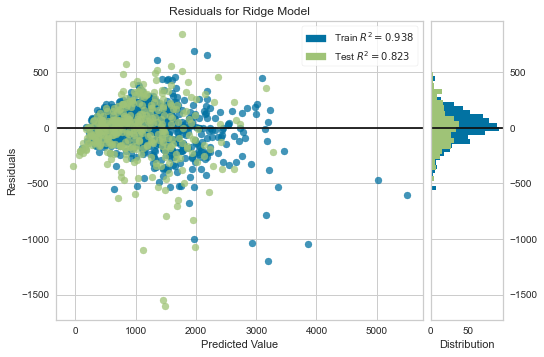

In [22]:
plot_model(tuned_rg)

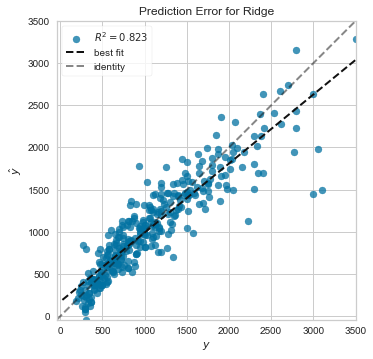

In [23]:
plot_model(tuned_rg, plot = 'error')

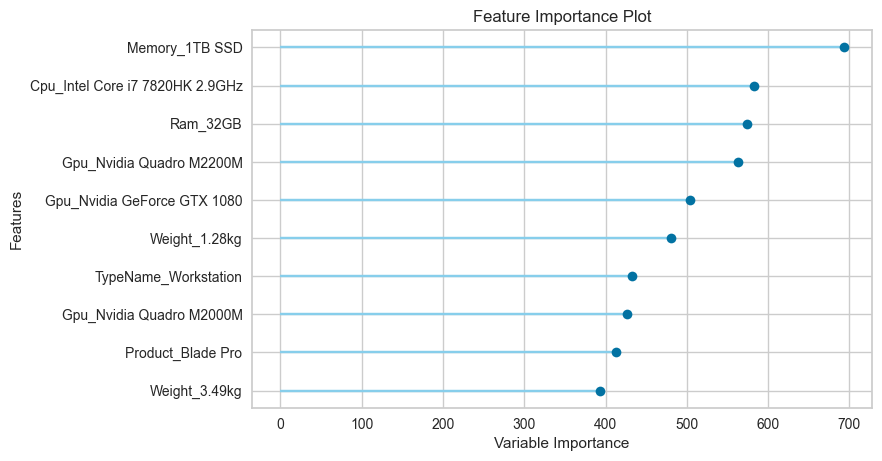

In [24]:
plot_model(tuned_rg, plot='feature')

In [25]:
evaluate_model(tuned_rg)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [26]:
predict_model(tuned_rg);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Ridge Regression,184.4919,72483.9688,269.2284,0.8232,0.3105,0.2015


In [27]:
final_rg = finalize_model(tuned_rg)

In [28]:
print(final_rg)

Ridge(alpha=2.81, copy_X=True, fit_intercept=False, max_iter=None,
      normalize=True, random_state=123, solver='auto', tol=0.001)


In [29]:
predict_model(final_rg);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Ridge Regression,134.9926,38685.5898,196.6865,0.9056,0.1969,0.1514


In [30]:
unseen_predictions = predict_model(final_rg, data=data_unseen)
unseen_predictions.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Label
0,6,Acer,Aspire 3,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4GB,500GB HDD,AMD Radeon R5,Windows 10,2.1kg,400.0,339.273376
1,8,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,256GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,1158.7,1127.887085
2,14,Dell,Inspiron 3567,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2GHz,4GB,256GB SSD,AMD Radeon R5 M430,Windows 10,2.2kg,498.9,605.068298
3,18,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.9GHz,16GB,512GB SSD,AMD Radeon Pro 560,macOS,1.83kg,2858.0,2384.320068
4,19,Lenovo,IdeaPad 320-15IKB,Notebook,15.6,Full HD 1920x1080,Intel Core i3 7100U 2.4GHz,8GB,1TB HDD,Nvidia GeForce 940MX,No OS,2.2kg,499.0,497.664276


In [31]:
from pycaret.utils import check_metric
check_metric(unseen_predictions.Price_euros, unseen_predictions.Label, 'R2')

0.835

In [32]:
save_model(final_rg,'Final Ridge Model 04May2022')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=False,
                                       features_todrop=['laptop_ID'],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[],
                                       target='Price_euros', time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,...
                 ('dummy', Dummify(target='Price_euros')),
                 ('fix_perfect', Remove_100(target='Price_euros')),
                 ('clean_names', Clean_Colum_Names()),
                 ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                 ('dfs', 'passthrough'), ('p